# EDA Grade

This notebooks has the goal to explore and undestand the data related with 100x100 grid cells of every NUI center

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import geopandas as gpd
import pickle

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 116)

## Prepare Dataset

In [4]:
grid = pd.read_pickle("data/compacted_data/grade.pkl")

In [8]:
y = pd.read_pickle("data/compacted_data/y.pkl").rename(columns={"nuis": "y"})[["gid", "y"]]

In [9]:
df = grid.merge(y, on='gid', how='left')

In [10]:
df.head()

,gid,ID,UF,Col,Row,Polo,Declividade,Curvatura,APP30m,UCIntegral,AltaTensao,Vias50m,Dutovias,IndiceForma,DomSIden,DomSIlu,DomSPav,DomSCal,DomSFio,DomSBue,DomSArb,DomSEne,DomSAgua,DomSMed,DomSEsg,DomSRedeEsg,DomCLixAc,DomSColLix,DomSColLixDir,DomApto,DomCasa,DomVila,DomImpr,DomAdeq,DomAdeqSN,DomAdeqCN,DomSemiAdeq,DomInadeq,DomPosseOutro,DomSBan,DomNBanDom,DomNBanHab,AguaRede,AguaNascente,AguaCisterna,AguaOutra,EsgotoRede,EsgotoSeptica,EsgotoRudimentar,EsgotoVala,EsgotoRio,EsgotoOutro,LixoLimpeza,LixoQueimado,LixoAterrado,LixoJogado,LixoRio,LixoOutro,LixoCacamba,Ren0SM,RenMeioSM,Ren1a2SM,Ren3SM,RenPopDependente,RenPopAtiva,RenResp3SM,RenRespMedia,NDenDom,NDenPop,NMoradores,NPes10Alf,NRespAlf,NRespFem,NRespIdade,NResp30,NResp30NAlf,mchefe_fmenor,vulner_dia,dom_vulner_idoso,t_analf_18m,t_analf_25m,t_c0a5_fora,t_c6a14_fora,t_m10a17_filho,t_analf_15m,t_cdom_fundin,t_desocup18m,t_p18m_fundin_informal,t_pop18m_fundc,t_pop5a6_escola,t_pop11a13_ffun,t_pop15a17_fundc,t_pop18a20_medioc,prosp_soc,espvida,t_mort2,t_fmor6,t_fectot,t_env,vulner15a25,t_densidadem3,i_gini,t_p15a24_nada,t_vulner_depende_idosos,rdpc_def_vulner,t_nremunerado_18m,t_vulner_mais1h,t_renda_trab,t_carteira_18m,t_scarteira_18m,t_setorpublico_18m,t_contapropria_18m,t_empregador_18m,t_formal_18m,t_atividade10a15,geometry,y
0,100ME5208050N7956750,C10L1067,RS,10.0,1067.0,Porto Alegre,4.919002,6.333333,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60223,99.256506,0.0,0.0,0.888476,0.0,85.130112,99.628253,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014870,14.126394,1.003717,0.300000,0.743494,53.159851,0.0,46.096653,0.0,11.152415,46.096653,27.137547,2.230483,1.858736,0.371747,58.364311,7.063197,18.959106,0.371747,0.371747,14.498140,15.985,41.636,10.781,57.249071,39.444444,60.555556,0.007435,1054.160034,0.000000,0.000000,3.35,85.349462,82.899628,21.189591,47.122677,0.828996,0.838565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((5208000.000 7956700.000, 5208100.000...",0.0
1,100ME5208050N7956850,C10L1068,RS,10.0,1068.0,Porto Alegre,4.900816,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60223,99.256506,0.0,0.0,0.884402,0.0,85.130112,99.628253,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014802,14.126394,1.003717,0.298624,0.740085,52.916077,0.0,45.885273,0.0,11.101275,45.885273,27.013102,2.220255,1.850212,0.370043,58.096672,7.030807,18.872168,0.370043,0.370043,14.431658,15.985,41.636,10.781,57.249071,39.444444,60.555556,0.007401,1049.325928,0.000000,0.000000,3.35,85.349462,82.899628,21.189591,47.122677,0.825195,0.834720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((5208000.000 7956800.000, 5208100.000...",0.0
2,100ME5208050N7956950,C10L1069,RS,10.0,1069.0,Porto Alegre,4.152381,4.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60223,99.256506,0.0,0.0,0.565728,0.0,85.130112,99.628253,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009468,14.126394,1.003717,0.191022,0.473412,33.848972,0.0,29.351555,0.0,7.101182,29.351555,17.279545,1.420236,1.183530,0.236706,37.162853,4.497416,12.072010,0.236706,0.236706,9.231538,15.985,41.636,10.781,57.249071,39.444444,60.555556,0.004734,671.225159,0.000000,0.000000,3.35,85.349462,82.899628,21.189591,47.122677,0.527855,0.533947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((5208000.000 7956900.000, 5208100.000...",0.0
3,100ME5208150N7956750,C11L1067,RS,11.0,1067.0,Porto Alegre,3.205212,7.777778,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.60223,99.256506,0.0,0.0,0.888476,0.0,85.130112,99.628253,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014870,14.126394,1.003717,0.300000,0.743494,53.159851,0.0,46.096653,0.0,11.152416,46.096653,27.137545,2.230483,1.858

In [11]:
print(f"Lines: {len(df) } - Columns: {len(df.columns)}")

Lines: 735158 - Columns: 117


In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=True)
print(percent_missing.loc[percent_missing > 10])

Dutovias                   10.143262
mchefe_fmenor              51.389633
vulner_dia                 51.389633
dom_vulner_idoso           51.389633
t_analf_18m                51.389633
t_analf_25m                51.389633
t_c0a5_fora                51.389633
t_c6a14_fora               51.389633
t_m10a17_filho             51.389633
t_analf_15m                51.389633
t_cdom_fundin              51.389633
t_desocup18m               51.389633
t_p18m_fundin_informal     51.389633
t_pop18m_fundc             51.389633
t_pop5a6_escola            51.389633
t_pop11a13_ffun            51.389633
t_pop15a17_fundc           51.389633
t_pop18a20_medioc          51.389633
prosp_soc                  51.389633
espvida                    51.389633
t_mort2                    51.389633
t_fmor6                    51.389633
t_fectot                   51.389633
t_env                      51.389633
vulner15a25                51.389633
t_densidadem3              51.389633
i_gini                     51.389633
t


## Univariate Analysis

### Class balance

[Text(0, 0, '0.839209'), Text(0, 0, '0.160791')]

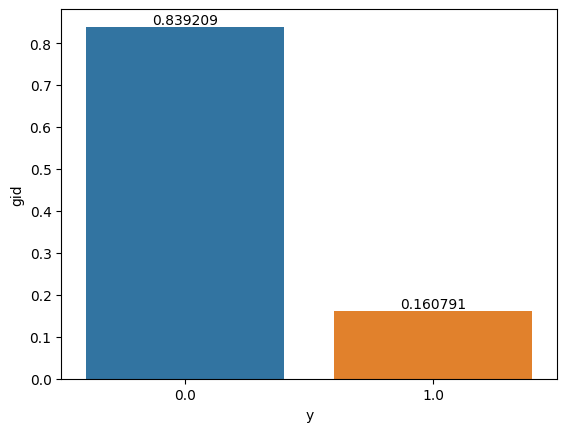

In [15]:
class_balance = df.groupby(["y"]).count()/ len(df)
ax = sns.barplot(data=class_balance.reset_index(), x="y", y="gid")
ax.bar_label(ax.containers[0])

In [14]:
class_balance

,gid,ID,UF,Col,Row,Polo,Declividade,Curvatura,APP30m,UCIntegral,AltaTensao,Vias50m,Dutovias,IndiceForma,DomSIden,DomSIlu,DomSPav,DomSCal,DomSFio,DomSBue,DomSArb,DomSEne,DomSAgua,DomSMed,DomSEsg,DomSRedeEsg,DomCLixAc,DomSColLix,DomSColLixDir,DomApto,DomCasa,DomVila,DomImpr,DomAdeq,DomAdeqSN,DomAdeqCN,DomSemiAdeq,DomInadeq,DomPosseOutro,DomSBan,DomNBanDom,DomNBanHab,AguaRede,AguaNascente,AguaCisterna,AguaOutra,EsgotoRede,EsgotoSeptica,EsgotoRudimentar,EsgotoVala,EsgotoRio,EsgotoOutro,LixoLimpeza,LixoQueimado,LixoAterrado,LixoJogado,LixoRio,LixoOutro,LixoCacamba,Ren0SM,RenMeioSM,Ren1a2SM,Ren3SM,RenPopDependente,RenPopAtiva,RenResp3SM,RenRespMedia,NDenDom,NDenPop,NMoradores,NPes10Alf,NRespAlf,NRespFem,NRespIdade,NResp30,NResp30NAlf,mchefe_fmenor,vulner_dia,dom_vulner_idoso,t_analf_18m,t_analf_25m,t_c0a5_fora,t_c6a14_fora,t_m10a17_filho,t_analf_15m,t_cdom_fundin,t_desocup18m,t_p18m_fundin_informal,t_pop18m_fundc,t_pop5a6_escola,t_pop11a13_ffun,t_pop15a17_fundc,t_pop18a20_medioc,prosp_soc,espvida,t_mort2,t_fmor6,t_fectot,t_env,vulner15a25,t_densidadem3,i_gini,t_p15a24_nada,t_vulner_depende_idosos,rdpc_def_vulner,t_nremunerado_18m,t_vulner_mais1h,t_renda_trab,t_carteira_18m,t_scarteira_18m,t_setorpublico_18m,t_contapropria_18m,t_empregador_18m,t_formal_18m,t_atividade10a15,geometry
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,76.232864,83.920871,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,83.920871,79.913162,79.913162,79.913162,79.913162,79.913162,79.913162,79.913434,79.913162,79.913162,79.913162,79.913162,79.913162,83.920871,79.913162,79.913162,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,83.920871,79.997905,79.997905,79.997905,79.931253,81.538254,81.538254,83.920871,83.920871,83.920871,83.920871,81.579878,79.953697,79.931253,81.597969,81.515810,83.920871,83.920871,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,40.538224,83.920871
1.0,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,13.623874,16.079129,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,16.079129,15.854687,15.854687,15.854687,15.854687,15.854687,15.854687,15.855095,15.854687,15.854687,15.854687,15.854687,15.854687,16.079129,15.854687,15.854687,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,16.079129,15.864889,15.864889,15.864889,15.855095,15.985679,15.985679,16.079129,16.079129,16.079129,16.079129,15.988672,15.855775,15.855095,15.989216,15.984999,16.079129,16.079129,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,8.072142,16.079129


### Residents per Household Distribution

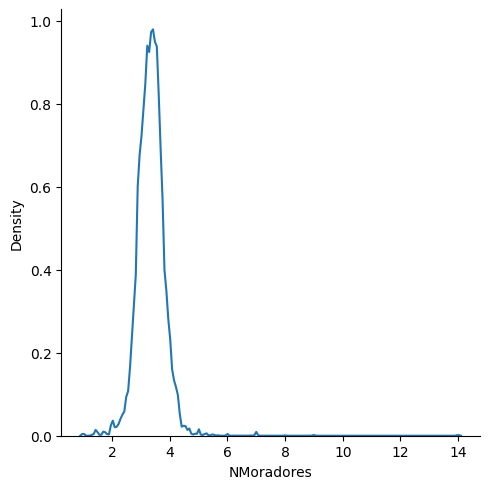

In [10]:
sns.displot(data=df, x="NMoradores", kind="kde")

### Dutovias distribution

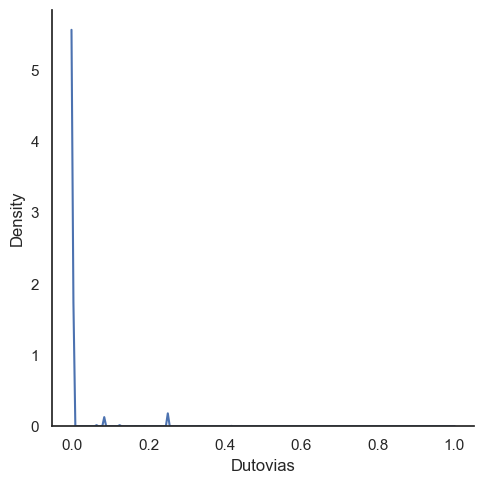

In [24]:
sns.displot(data=df, x="Dutovias", kind="kde")

## Bivariate analysis

### Income Distribution by Class

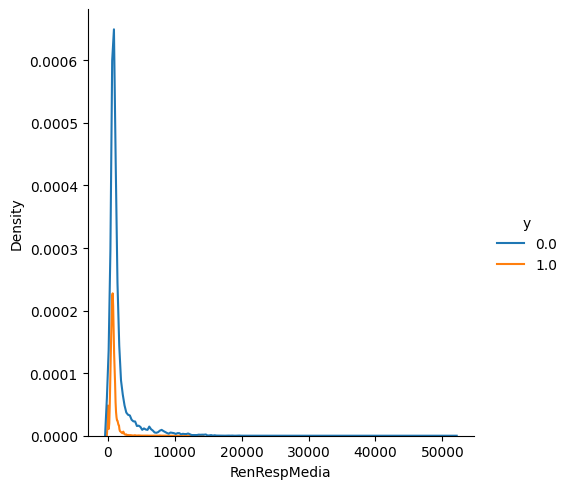

In [11]:
sns.displot(data=df, x="RenRespMedia", hue="y", kind="kde")

### Distribution of % of women as resident responsible by Class

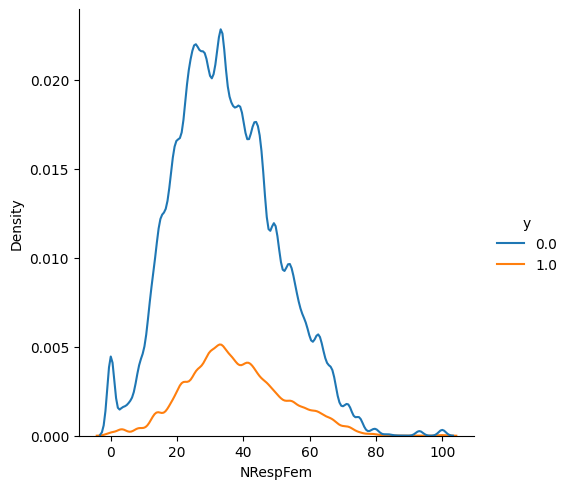

In [12]:
sns.displot(data=df, x="NRespFem", hue="y", kind="kde")

## Multivariate Analysis

### Correlation

C:\Users\Caio\AppData\Local\Temp\ipykernel_19136\1141328693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=False, linewidths=.1, ax=ax)


<Axes: >

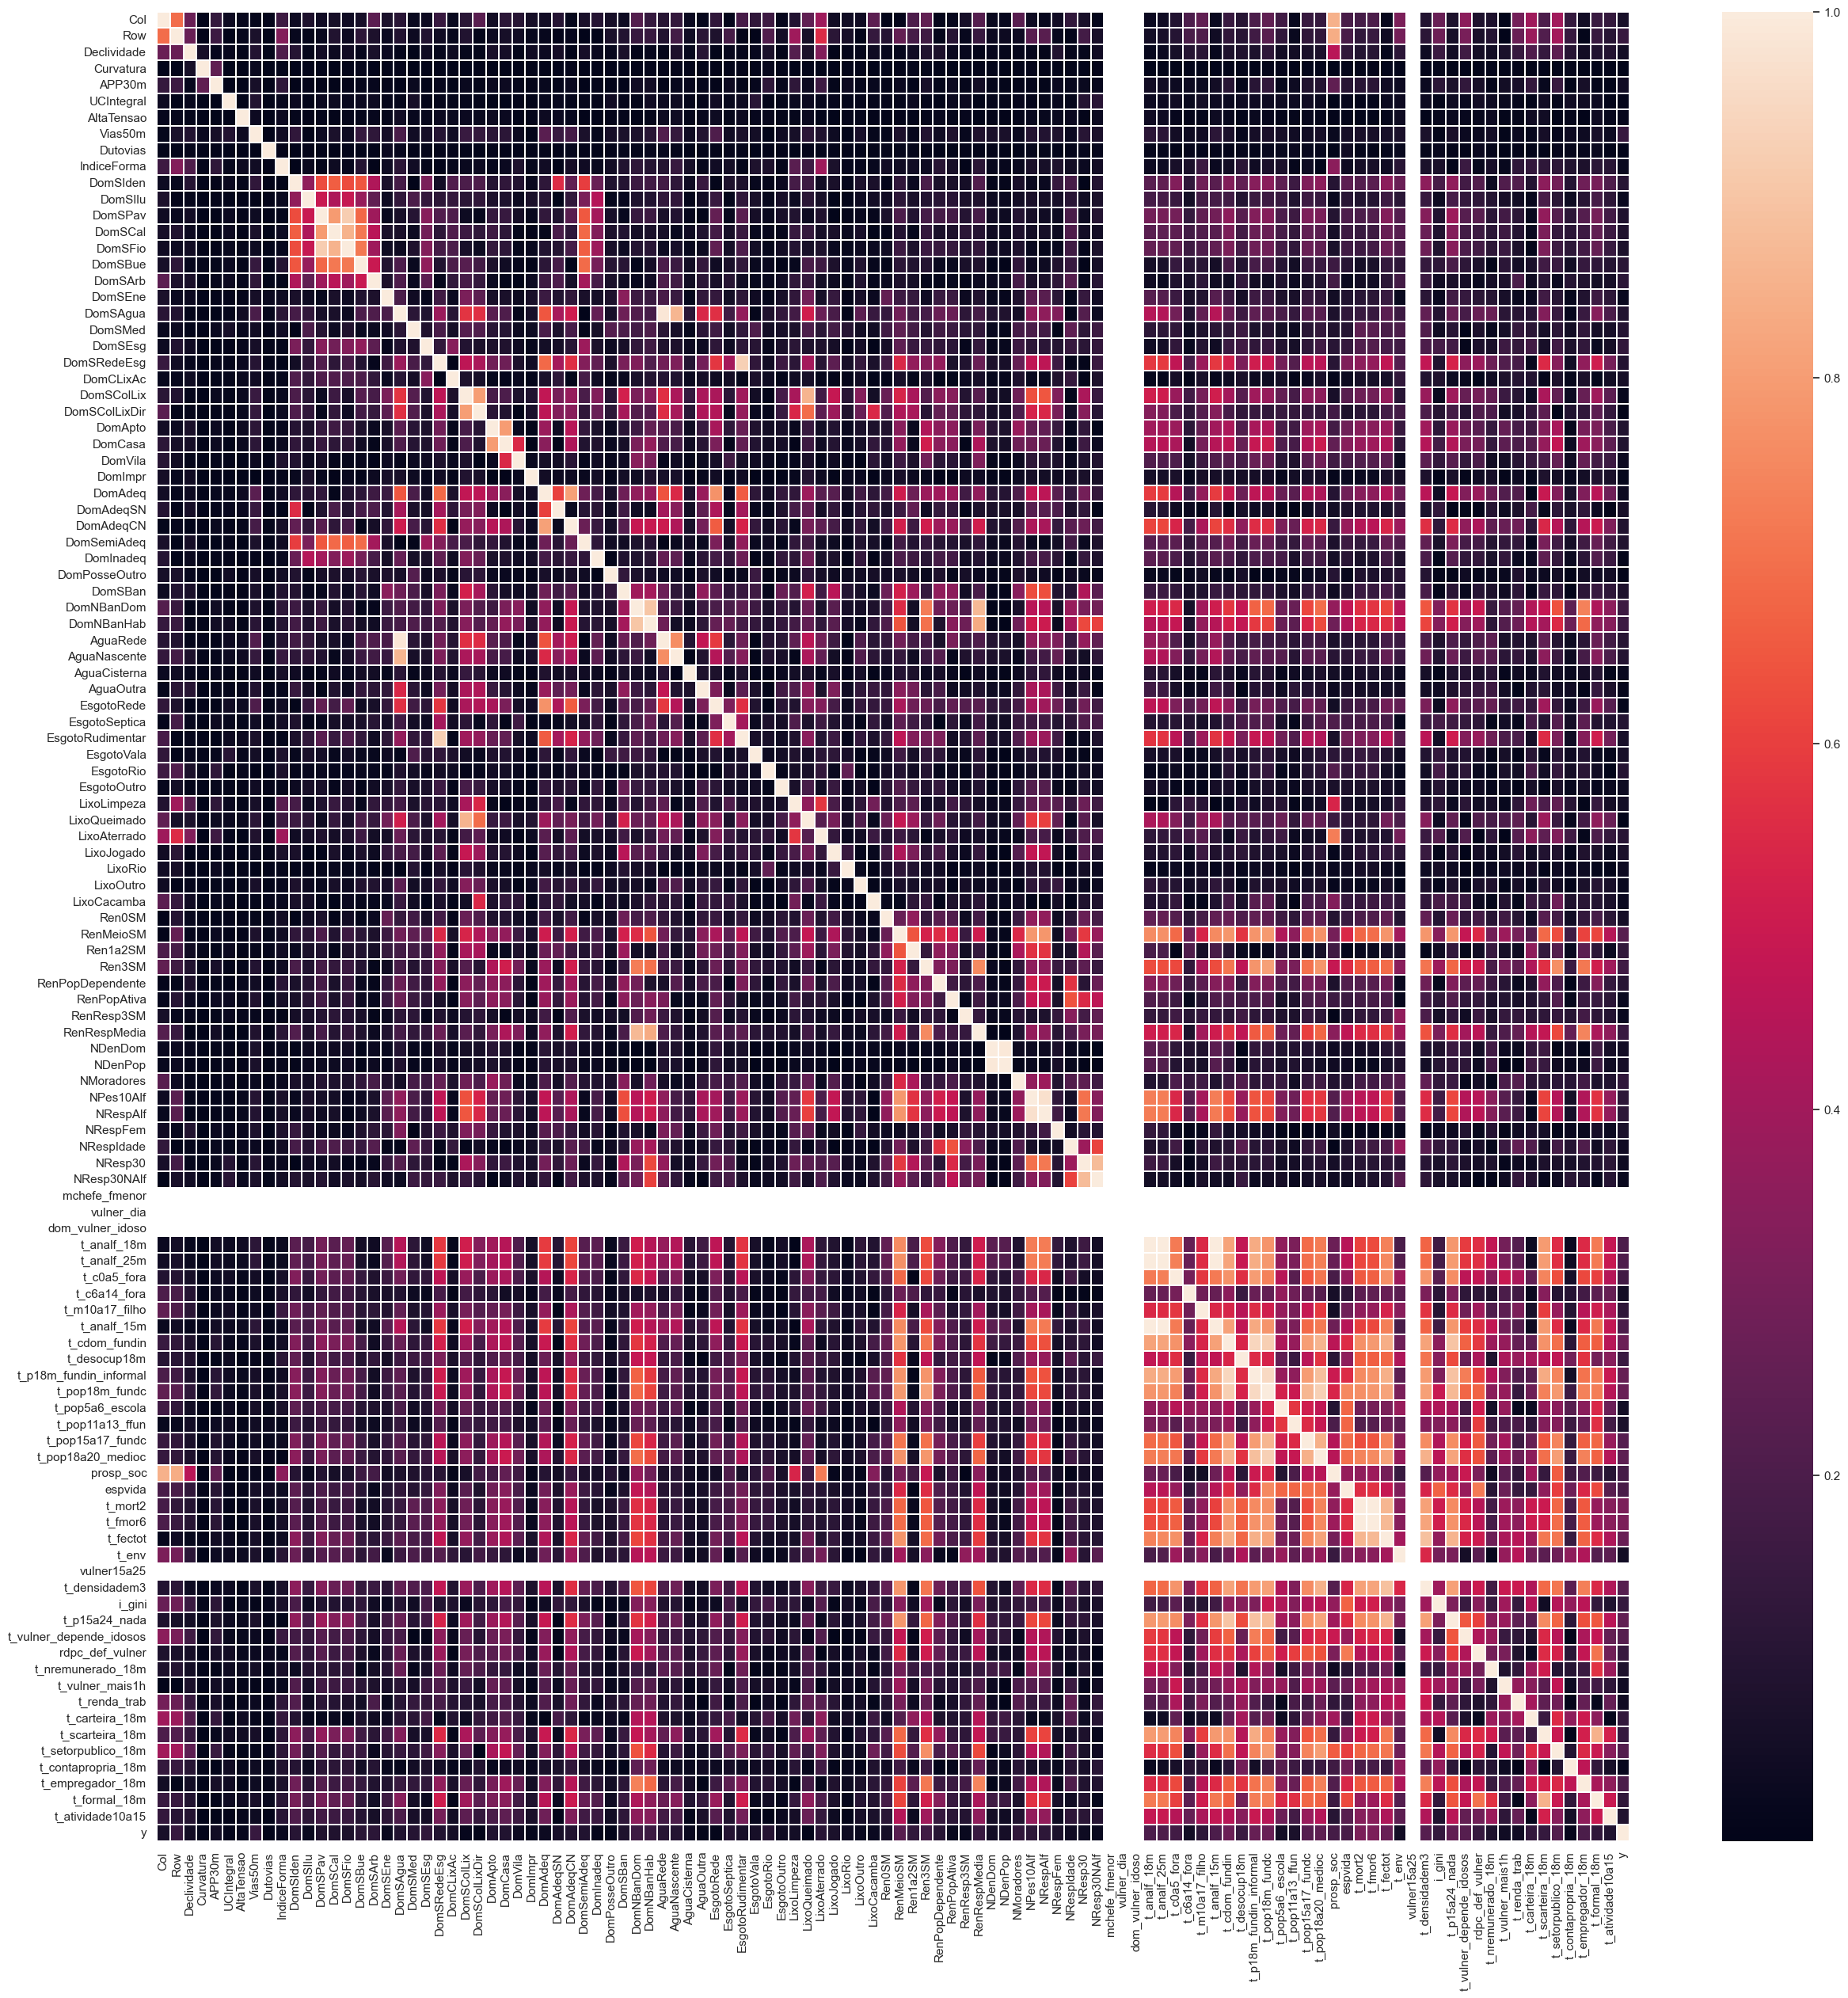

In [23]:

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(df.corr().abs(), annot=False, linewidths=.1, ax=ax)